# Import libraries

In [26]:
%matplotlib inline

import datetime
import collections

import numpy as np
import ps_data_science_tools as ps_dst
from nn_modules import NetDropout
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

torch.set_printoptions(edgeitems=2)
torch.manual_seed(42)

# Load data

In [27]:
data_path = '../cifar10_pytorch/data'
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
class_names_dict = dict(zip(range(len(class_names)), class_names))

# load dict with consts
dict_consts = torch.load('dict_consts.pth', weights_only=False)
mean = dict_consts['mean']
std = dict_consts['std']

cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]))

cifar10_val_without_norm = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
    ]))

Files already downloaded and verified
Files already downloaded and verified


# Load model

In [29]:
# Device Configuration
device = (torch.device('cuda') if torch.cuda.is_available()
          else torch.device('cpu'))

model = NetDropout(n_chans1=64).to(device)
model.load_state_dict(torch.load('model_' +'cifar10.pt', weights_only=True, map_location=device))
model.eval()

# Теперь `model` готова к использованию для инференса!
print(f"The model is ready for use in eval mode on {device}")

The model is ready for use in eval mode on cuda


# Model tests

Class: bird


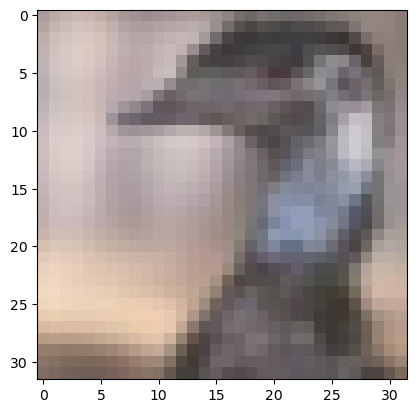

In [82]:
image_number = 135 # 577 - incorrect


ps_dst.show_picture_cifar10(cifar10_val_without_norm[image_number])

In [83]:
# predict
outputs = model(cifar10_val[image_number][0].to(device).unsqueeze(0))
_, predicted = torch.max(outputs, dim=1)

In [84]:
# validate
real_answer = class_names_dict[cifar10_val_without_norm[image_number][1]]
model_answer = class_names_dict[predicted.item()]
if real_answer == model_answer:
    result = 'correct'
else:
    result = 'incorrect'
    

print(f"""
Real answer: {real_answer}
Model answer: {model_answer}

Result:
Model response is {result}
""")


Real answer: bird
Model answer: bird

Result:
Model response is correct

